In [11]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np


In [12]:
def monte_carlo_simulation(data, num_simulations, num_days):
    returns = data['Close'].pct_change().dropna().to_numpy()
    last_price = data['Close'].iloc[-1]

    simulations = np.zeros((num_simulations, num_days))
    for i in range(num_simulations):
        noise = np.random.normal(0, np.std(returns), num_days - 1)
        price_simulation = np.cumprod(1 + np.concatenate(([0], noise))) * last_price
        simulations[i, :] = price_simulation

    return simulations


In [13]:
# Define the stock symbol and time period
symbol = "AAPL"
start_date = "2023-12-31"
end_date = "2024-01-31"

# Download historical stock data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)

# Number of Monte Carlo simulations and days into the future
num_simulations = 10
num_days = 30

# Run Monte Carlo simulation
simulations = monte_carlo_simulation(data, num_simulations, num_days)


[*********************100%%**********************]  1 of 1 completed


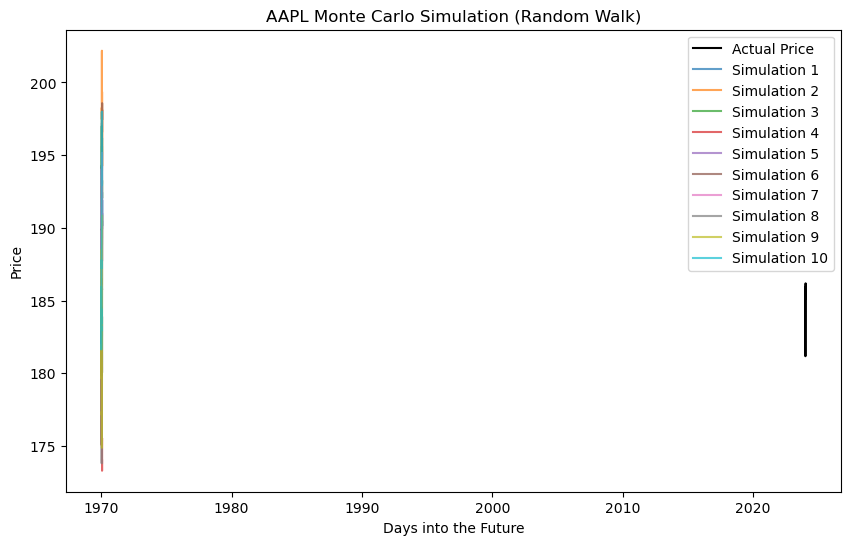

In [14]:
# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Actual Price', color='black')

for i in range(num_simulations):
    plt.plot(simulations[i, :], label=f'Simulation {i + 1}', alpha=0.7)

plt.title(f'{symbol} Monte Carlo Simulation (Random Walk)')
plt.xlabel('Days into the Future')
plt.ylabel('Price')
plt.legend()
plt.show()

In [16]:
simulations

array([[185.91999817, 187.01131722, 186.65565425, 187.87444896,
        189.08792048, 189.61783627, 190.69203141, 188.2400047 ,
        189.71353081, 187.26961172, 186.18551902, 186.86982785,
        185.83137965, 184.83745292, 186.30539748, 182.39918087,
        184.50527251, 185.991731  , 187.31309838, 189.83913322,
        187.42507636, 187.5468141 , 187.62523306, 189.65215615,
        188.86718148, 190.49069617, 189.91642005, 191.91061188,
        190.13886594, 192.3835143 ],
       [185.91999817, 184.64744299, 184.82485846, 185.32924579,
        185.63957255, 186.6034411 , 187.11402688, 185.95685714,
        187.46018422, 189.93640216, 190.26162702, 189.68102071,
        189.22289349, 188.67578875, 192.87208287, 192.06782696,
        192.07778333, 194.66965148, 196.19737446, 198.26948681,
        197.46345956, 201.90305417, 202.18459898, 200.28543667,
        193.95868824, 196.79808257, 199.35579704, 196.89652197,
        194.25605452, 198.05431495],
       [185.91999817, 188.1873